# Bechdel Test Data Analysis

The aim of this project will be to predict a movie's Bechdel Test verdict based on information like rating, genre, budget, cast, etc. 

The Bechdel Test: A test consisting of 3 criteria that build on eachother, meant to test if a movie has a certain level of female representation. To pass the Bechdel Test, a movie must...
1. Have at least 2 named female characters
2. The female characters must have a conversation with each other
3. They must talk about something other than men
If you want to know more about the Bechdel Test, you can find out more here https://en.wikipedia.org/wiki/Bechdel_test

The data that I started with for this project came from https://github.com/fivethirtyeight/data/tree/master/bechdel, Fivethirtyeight's github page. The following article uses this data set to show how movies which pass the Bechdel Test tend to do better in the box office. http://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/ I aim to build upon this data and discover new trends.

First, here are a few charts based on the original data set.

# I: Preliminary Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bechdel_data_min.csv")
df.head()

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,comedy,R,13000000
1,2012,tt1343727,Dredd 3D,ok,PASS,scifi,R,45658735
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,drama,R,20000000
3,2013,tt1272878,2 Guns,notalk,FAIL,action,R,61000000
4,2013,tt0453562,42,men,FAIL,drama,PG13,40000000


Here you can actually see some columns I added in later. The columns that are not filled with NaN's are the originals. 

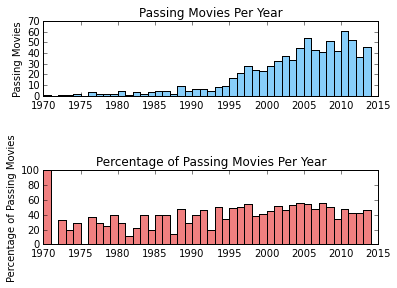

In [2]:
# making a chart of number of passing movies per year

passed_per_year = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    passed_per_year.append([i, (passed)])
    
df_ppy = pd.DataFrame(passed_per_year, columns = ['year', 'passing'])

# making a chart of percentage of passing movies per year

passed_vs_total = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    total = len(df[df.year == i])
    passed_vs_total.append([i, (passed/float(total))*100])
    
df_pvt = pd.DataFrame(passed_vs_total, columns = ['year', 'p_passing'])

plt.subplot(2, 1, 1)
plt.bar(df_ppy.year, df_ppy.passing,1, color='lightskyblue')
plt.ylabel('Passing Movies')
plt.title('Passing Movies Per Year')

plt.subplot(2, 1, 2)
plt.bar(df_pvt.year, df_pvt.p_passing,1, color='lightcoral')
plt.ylabel('Percentage of Passing Movies')
plt.title('Percentage of Passing Movies Per Year')
plt.subplots_adjust(hspace=1)

While it appears that movies these days are more likely to pass the Bechdel test, it's just that more movies are being produced. About half the movies pass per year. 

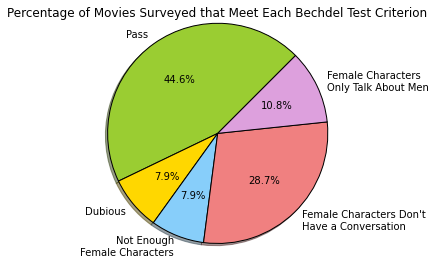

In [3]:
# percent of total movies surveyed that totally pass, fail different parts

length = len(df)
categories = ["ok", "dubious", "nowomen", "notalk", "men"]
criterion_ps = []
for category in categories:
    criterion_ps.append((len(df[df.clean_test == category]))/float(length))


cats = ["Pass", "Dubious", "Not Enough \nFemale Characters", "Female Characters Don't \nHave a Conversation", "Female Characters \nOnly Talk About Men"]
plt.pie(criterion_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=45, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Percentage of Movies Surveyed that Meet Each Bechdel Test Criterion')


Most movies fail the Bechdel test because even though they have named female characters, those characters don't ever talk to each other. 

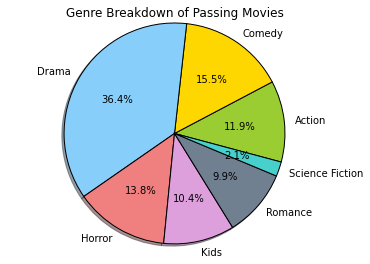

In [4]:
# of movies that passed, what percents of each genre

passed_total = len(df[df.binary == "PASS"])
genres = ["action","comedy","drama","horror","kids","romance","scifi"]
genre_ps = []
for genre in genres:
    genre_ps.append((len(df[(df.binary == "PASS") & (df.genre == genre )]))/float(passed_total))

cats = ["Action","Comedy","Drama","Horror","Kids","Romance","Science Fiction"]
plt.pie(genre_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum', 'slategray','mediumturquoise'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=-15, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Genre Breakdown of Passing Movies')

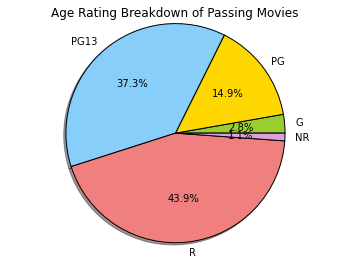

In [5]:
# of movies that passed, what age rating of each movie

ratings = ["G","PG","PG13","R","NR"]
rating_ps = []
for rating in ratings:
    rating_ps.append((len(df[(df.binary == "PASS") & (df.age_rating == rating )]))/float(passed_total))

plt.pie(rating_ps, explode=None, labels = ratings,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Age Rating Breakdown of Passing Movies')

As you can see here, sadly not very many kids movies pass the Bechdel test :( These are just some preliminary charts, there will be more to come once I add in more data. 

# II: Aquiring More Data

To fill out the data more and make my analysis different from the previously mentioned article, I decided to add in imdb's star_rating, director, cast, and writers. I went through a few different ways of getting this data, and ultimately landed on IMDBpy.

In [6]:
from imdb import IMDb
im = IMDb()

#just a little test to show imdbpy works
id = df.iloc[4][1] # snagging the movie id for the movie "42"
real_id = int(id[2:]) # converting to an int
movie = im.get_movie(real_id) #getting the movie object from imdbpy
df.loc[4, 'star_rating'] = movie['rating']# setting the cell
df.head()

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$,star_rating
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,comedy,R,13000000,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,scifi,R,45658735,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,drama,R,20000000,NaN
3,2013,tt1272878,2 Guns,notalk,FAIL,action,R,61000000,NaN
4,2013,tt0453562,42,men,FAIL,drama,PG13,40000000,7.5


When you lookup a movie on imdbpy, you get back a movie object, which holds information about the movie like star_rating and such. Here you can see in row: 4, column: star rating, the star rating has been changed to 7.5.

So the code that follows is commented out because it takes a very long time to run. This was one struggle I faced when getting the imdb data. Either I could get all the data in a file and then find a way to parse it into a dataframe myself, or use IMDBpy which did that easily for me but took a long time. You can download IMDBpy  and get more information about it here http://imdbpy.sourceforge.net/

In [7]:
#movies = dict()
#for i in range (len(df)):
    #id = df.iloc[i][1]
    #real_id = int(id[2:])
    #movie = im.get_movie(real_id)
    #movies[real_id] = movie
    
#def add_zeros(id_number):
#    str_id = str(id_number)  
#    while len(str_id) < 7: 
#        str_id = '0' + str_id     
#    return str_id

#def arr_to_string(thing):
#    new = []
#    for i in thing:
#        new.append(str(i))
#    return str(new)

#for movie_id in movies:
#    real_movie = movies[movie_id]   
#    df_id = 'tt' + add_zeros(movie_id) 
#    if len(df[df.imdb == df_id].index.values) == 0:
#        continue
#    i = df[df.imdb == df_id].index.values[0]
#    df.ix[i, 'star_rating'] = real_movie.get('rating')   
#    df.ix[i, 'director'] = real_movie['directed by'][0]  
#    df.ix[i, 'cast'] = arr_to_string(real_movie['actors'][:5])
#    #df.ix[i, 'writer'] = arr_to_string(real_movie.get('writer'))
#    df.ix[i, 'genre'] = real_movie['genre'][0]

#df.to_csv('complete_movies.csv')

Once I had taken the time to get all the data, I needed a way to put it somewhere so I could process it later. This is why this part is a little bit messy. 

The add_zeros function is necessary because in taking a string id, for example 'tt0021425', by making then taking [2:] of it, or '0021425', and then turning that into an int, we are left with 21425. This can be used to look up movies on imdbpy, but when we try to simply add back the 'tt' to look it up in our original dataframe, we get 'tt21425'.

The arr_to_string function deals with a problem that I did not realize the root of until later. Dataframes are not great at holding arrays. Thus my messy way around it here was just to take the names of the writers and actors from the writer and actor objects and put them into a string which I'll later convert back into an array. 

# III: Prepping All the Data for Analysis

So for the analysis phase of this project I'll be using a Decision Tree. Thus I must convert all of the data in each column into numbers. Categorizing the splits is not so straightforward for each label.

years - split into 5 year periods

ids, clean_test and titles - keep, but don't analyze

binary, genre, rating, and director - use sci-kit's LabelEncoder()

budgets - these turned out to be too big, so i interpreted them in the 1000s instead.

star_ratings - make integer cutoffs

cast, writer - something special which I'll talk about later

In [323]:
import math
import string
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import cross_validation

df = pd.read_csv("complete_movies.csv")

lab = preprocessing.LabelEncoder()
df['binary'] = lab.fit_transform(df['binary'])

In [324]:
# making actor/writer strings back into arrays of actors/writers

def string_to_arr(thing):
    thing = string.replace(thing,"'", "")
    thing = string.replace(thing,"[","")
    thing = string.replace(thing,"]","")
    new = string.split(thing, ',')
    return new

#first set all the nans to ""

df.cast.fillna("", inplace=True)
df.writer.fillna("", inplace=True)

# because I can't store these in the dataframe, they go in their own array

actor_array = []
writer_array = [] 
for i in range (len(df)):
    actor_array.append(string_to_arr(df.ix[i,10]))
    writer_array.append(string_to_arr(df.ix[i,11]))


Next I tackled how to tell how influential an actor or writer might be in the passing of a movie. I made a dictionary with actors as keys, and an array of 1s and 0s as values. Each 1 represents a passing movie the actor has appeared in, while each 0 represents a fail. Then I can easily check for any given actor what percentage of their movies has passed the test. Similarly for the writers.

In [325]:
def make_into_dict(arr, df):
    dictionary = {}
    for i in range(len(arr)):
        #verdict is 1 for pass, 0 for fail 
        verdict = df.ix[i,4]
        #gets the cast list for movie index i 
        people = arr[i]
        for person in people:
            #puts a person in the dictionary and/or adds their passing/failing movie
            if person in dictionary:
                dictionary[person].append(verdict)
            else:
                dictionary[person] = [verdict]
    return dictionary

# Making the actual dictionaries for actors and writers

actor_pass_dict = make_into_dict(actor_array, df)
writer_pass_dict = make_into_dict(writer_array, df)

For cast information, what I'll be doing is going through the actors dictionary and for each actor, assessing the percentage of their movies that pass. The more movies they are in, the more weight they have as well. Then I'll take the weighted average for a movie based on the main 5 (or less)cast members. I'll use this in conjuction with the decision tree to see if a movie will likely pass.

I'll do the same with the writers.

In [326]:
#takes the original dictionary and calculates percentage
#passing per each key in the original dictionary
#then puts this into a  new dictionary
def percentages_dictionary(orig_dict):
    percents = {}
    for person in orig_dict:
        movies = orig_dict[person]
        percents[person] = np.sum(movies)/float(len(movies))
    return percents
    
print actor_pass_dict['Mark Wahlberg']
actor_percents = percentages_dictionary(actor_pass_dict)
print actor_percents['Mark Wahlberg']

[0, 1, 0, 0, 1, 1, 0, 0]
0.375


In [327]:
#just doing the same for the writers dictionary as well

writer_percents = percentages_dictionary(writer_pass_dict)

In [339]:
for i in range (len(df)):
    cast = actor_array[i]
    writers = writer_array[i]
    cast_count = 0
    cast_sum = 0
    write_count = 0
    write_sum = 0
    if cast[0] != "":
        for person in cast:
            cast_sum += actor_percents[person]*(len(actor_pass_dict[person]))
            cast_count += 1
        cast_avg = cast_sum/cast_count 
    else:
        cast_avg = 0
    if writers[0] != "":
        for writer in writers:
            write_sum += writer_percents[writer]*(len(writer_pass_dict[writer]))
            write_count += 1
        write_avg = write_sum/write_count 
    else:
        write_avg = 0
    df.ix[i,10] = cast_avg
    df.ix[i,11] = write_avg

df.to_csv('complete_movies_2.csv')

In [340]:
#making clean_test, binary, genre, age_rating, and director into ints

lab = preprocessing.LabelEncoder()
categoricals = ['clean_test','genre','age_rating','director']
for categorical in categoricals: df[categorical] = lab.fit_transform(df[categorical])

In [341]:
#making star_ratings into ints

for i in range (len(df)):
    star = df.ix[i,8]
    if not math.isnan(star):
        id = int(star)
        df.ix[i, 8] = id
    else:
        df.ix[i, 8] = -1

In [342]:
#puts years into year ranges

for i in range (len(df)):
    year = df.ix[i,0]
    #gets decade
    new_year = (year % 100) - (year % 10)
    #rounds new_year to the nearest half decade
    if year%10 >= 5:
        new_year += 5
    df.ix[i,0] = new_year

In [343]:
# Dividing budget_2013$ by 1000 so it can fit into int32 format

for i in range (len(df)):
    budget = df.ix[i,7]
    if not math.isnan(budget):
        df.ix[i,7] = budget/1000
    else:
        df.ix[i,7] = 10

Let's take a look at the writer and cast information now

In [344]:
print df.writer.max()
print df.writer.mean()
print df.writer.median()
print df.cast.max()
print df.cast.mean()
print df.cast.median()

7.5
0.82948543326
0.75
5.4
1.35625698324
1.2


Now I'll convert that into values that the Decision Tree Classifier can handle. I've decided (with some guessing and checking) that if a cast's average is more than 1.5, it will get a 1, and if a writer group's average is more than 0.8, it will get a 1. 

In [345]:
for i in range (len(df)):
    if df.ix[i,10] >= 1.5: #cast avg
        df.ix[i,10] = 1
    else:
        df.ix[i,10] = 0
    if df.ix[i,11] >= .8: #writer avg
        df.ix[i,11] = 1
    else:
        df.ix[i,11] = 0


In [346]:
#Checking to make sure all NaN's are filled

df.isnull().any()

year            False
imdb            False
title           False
clean_test      False
binary          False
genre           False
age_rating      False
budget_2013$    False
star_rating     False
director        False
cast            False
writer          False
dtype: bool

In [347]:
#Let's just check out what the dataframe looks like now too

df

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$,star_rating,director,cast,writer
0,10,tt1711425,21 &amp; Over,2,0,4,4,13,5,439,0,0
1,10,tt1343727,Dredd 3D,4,1,0,4,45,7,671,0,1
2,10,tt2024544,12 Years a Slave,2,0,3,4,20,8,828,0,0
3,10,tt1272878,2 Guns,2,0,0,4,61,6,65,0,0
4,10,tt0453562,42,1,0,3,3,40,7,102,0,0
5,10,tt1335975,47 Ronin,1,0,0,3,225,6,118,0,0
6,10,tt1606378,A Good Day to Die Hard,2,0,0,4,92,5,425,0,0
7,10,tt2194499,About Time,4,1,7,4,12,7,715,1,1
8,10,tt1814621,Admission,4,1,4,3,13,5,665,0,1
9,10,tt1815862,After Earth,2,0,0,3,130,4,527,0,0


# IV: The Analysis

In creating the decision tree, I'll drop the imdb id and title columns becuase they aren't really important here. I'll also drop the clean test column because as it turns out that is a huge tell as to whether or not the movie will pass :P 

In [348]:
df_new = df.drop(['imdb','title','clean_test'], axis = 1)
feature_cols = df_new.drop(['binary'], axis = 1).columns 
#all but the imdb, title, binary columns
X = df_new[feature_cols] # have to add in the other columns from arrays
y = df_new.binary

treeclf = DecisionTreeClassifier(max_depth = 2, random_state=4)
treeclf.fit(X, y)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=4, splitter='best')

In [349]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
        y, test_size=0.1, random_state=3)

treeclf.fit(X_train, y_train)
y_predictions = treeclf.predict(X_test)
print accuracy_score(y_test, y_predictions)

0.860335195531


In [350]:
scores = cross_validation.cross_val_score(treeclf, X, y, cv=15)
print scores
print scores.mean()

[ 0.85123967  0.80833333  0.90833333  0.85833333  0.87394958  0.8907563
  0.83193277  0.79831933  0.82352941  0.87394958  0.87394958  0.82352941
  0.8487395   0.87394958  0.83193277]
0.851385165637


In a previous version of this project, I did not use the cast average and writer average as feature columns in the decision tree. The best accuracy score I was able to get then was only about 60%. By adding those in and tweaking the cutoffs used, I was able to predict with more than 85% accuracy, which isn't incredibly ideal, but still pretty good.

In [146]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,year,0.000000
1,genre,0.000000
2,age_rating,0.000000
3,budget_2013$,0.000000
4,star_rating,0.000000
5,director,0.000000
6,cast,0.094595
7,writer,0.905405


Without the cast and writer feature columns, it seemed like genre, star_rating, budget, and director mattered most. Now however, it seems that the writer and cast feature columns are all that matter really. 



In [147]:
from sklearn.tree import export_graphviz
with open("bechdel.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)


<img src="bechdel.png">

And thus the decision tree! Later I'll actually test the decision tree with some new movies

# V: More Charts

Now that I have more information, here are a few more charts that show some different and interesting things about the data. 

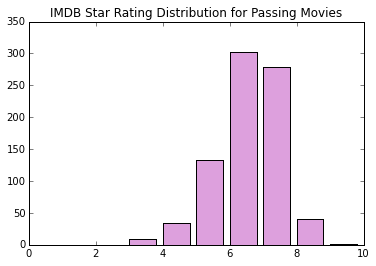

In [162]:
df = pd.read_csv("complete_movies.csv")

# making a chart for imdb star percentages for passing movies

for i in range (len(df)):
    thing = df.ix[i,8]
    if not math.isnan(thing):
        id = int(thing)
        df.ix[i, 8] = id

passing = df[df.binary == "PASS"]
categories = [0,1,2,3,4,5,6,7,8,9]
criterion_ps = []
for category in categories:
    criterion_ps.append(len(passing[passing.star_rating == category]))

cats = ["0 stars", "1 star", "2 stars", "3 stars", "4 stars", "5 stars", "6 stars", "7 stars", "8 stars", "9 stars"]
plt.bar(np.arange(10), criterion_ps, color='plum')
plt.title('IMDB Star Rating Distribution for Passing Movies')

You might think that more highly rated movies would be more likely to pass, but it might be the case that there are just very few 9 and 10 starred movies on IMDB.

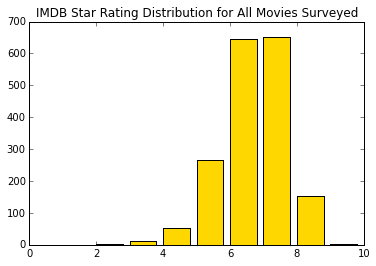

In [163]:
# making a chart for imdb star_ratings for general movies surveyed

categories = [0,1,2,3,4,5,6,7,8,9]
criterion_ps = []
for category in categories:
    criterion_ps.append(len(df[df.star_rating == category]))

plt.bar(np.arange(10), criterion_ps, color='gold')
plt.title('IMDB Star Rating Distribution for All Movies Surveyed')

As you can see, the distribution is pretty similar, so as we thought, there are just very few 9 and 10 starred IMDB movies, so 6 and 7 are considered fairly high star ratings.

In [166]:
df_2 = pd.read_csv("complete_movies_2.csv")

# The writers with the highest writer score in the dataframe

top_writers = writer_array[df_2.writer.argmax()]
print "The movie with the highest writers score was %s" % (df_2.title[df_2.writer.argmax()])
for person in top_writers:
    print "%s has %.2f movie passes out of %s movies" % (person , writer_percents[person], len(writer_pass_dict[person]))

print "Also the movie's binary score was %s" % (df_2.binary[df_2.writer.argmax()])

The movie with the highest writers score was The Matrix
Andy Wachowski has 0.86 movie passes out of 7 movies
 Lana Wachowski has 0.82 movie passes out of 11 movies
Also the movie's binary score was 1


In [187]:
#just a chart to show how writers score and binary correlate

df_3 = df_2.drop(['Unnamed: 0','year','imdb','clean_test','genre','age_rating','budget_2013$','star_rating','director', 'cast'], axis = 1)

for i in range (len(df_3)):
    df_3.ix[i, 'Writers score > 0.8?'] = (df_3.ix[i,2] > 0.8)
df_3

,title,binary,writer,Writers score > 0.8?
0,21 &amp; Over,0,0.000000,False
1,Dredd 3D,1,1.333333,True
2,12 Years a Slave,0,0.000000,False
3,2 Guns,0,0.000000,False
4,42,0,0.000000,False
5,47 Ronin,0,0.750000,False
6,A Good Day to Die Hard,0,0.000000,False
7,About Time,1,3.000000,True
8,Admission,1,1.000000,True
9,After Earth,0,0.000000,False


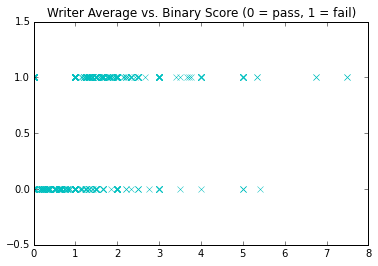

In [179]:
# making a chart for writer score distribution
plt.plot(df_3.writer, df_3.binary, 'cx')
plt.axis([0, 8, -.5, 1.5])
plt.title('Writer Average vs. Binary Score (0 = pass, 1 = fail)')

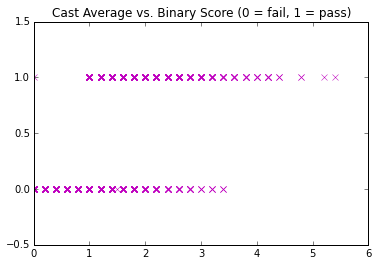

In [184]:
# making a chart for cast score distribution
plt.plot(df_2.cast, df_2.binary, 'mx')
plt.axis([0, 6, -.5, 1.5])
plt.title('Cast Average vs. Binary Score (0 = fail, 1 = pass)')

Looking at the second plot here, there are a lot of movies in the 1-2.5 range that fall in the pass category as well as the fail category. This overlap is a lot smaller in the first plot. From this we can tell that writer average is a lot more telling of whether or not a movie will pass than cast average.

#VI: Testing the Data with New Movies

Let's assess a few more recent movies. 

Avengers: Age of Ultron- Pass? Yes

Interstellar- Pass? Yes

Dawn of the Planet of the Apes- Pass? No

Edge of Tomorrow- Pass? No



In [257]:
Avengers_writers = ['Joss Whedon', 'Stan Lee']
Avengers_cast = ['Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Chris Evans', 'Scarlett Johansson']

Interstellar_writers = ['Jonathan Nolan', 'Christopher Nolan']
Interstellar_cast = ['Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain']

Apes_writers = ['Mark Bomback']
Apes_cast = ['Andy Serkis', 'Jason Clarke', 'Gary Oldman']

Edge_writers = ['Christopher McQuarrie','Jez Butterworth' ]
Edge_cast = ['Tom Cruise', 'Emily Blunt', 'Bill Paxton']

Let's see how well just the writer's information does at predicting the pass or fail of the movie

In [260]:
def test_writer(writers):
    write_sum = 0
    write_count = 0
    for writer in writers:
        write_sum += writer_percents[writer]*(len(writer_pass_dict[writer]))
        write_count += 1
    return write_sum/write_count 

print "Avenger writer score: %s" % (test_writer(Avengers_writers))
print "Interstellar writer score: %s" % (test_writer(Interstellar_writers))
print "Apes writer score: %s" % (test_writer(Apes_writers))
print "Edge writer score: %s" % (test_writer(Edge_writers))

Avenger writer score: 1.0
Interstellar writer score: 0.0
Apes writer score: 1.0
Edge writer score: 0.5


So we got 2 of 4 correct based just on writers (judging by the 0.8 cutoff), now lets try cast.

In [263]:
def test_cast(cast):
    cast_sum = 0
    cast_count = 0
    for actor in cast:
        if actor in actor_pass_dict:
            cast_sum += actor_percents[actor]*(len(actor_pass_dict[actor]))
            cast_count += 1
    return cast_sum/cast_count 

print "Avenger cast score: %s" % (test_cast(Avengers_cast))
print "Interstellar cast score: %s" % (test_cast(Interstellar_cast))
print "Apes cast score: %s" % (test_cast(Apes_cast))
print "Edge cast score: %s" % (test_cast(Edge_cast))

Avenger cast score: 0.5
Interstellar cast score: 1.66666666667
Apes cast score: 0.5
Edge cast score: 1.0


From this information, we could say Avengers passes, Interstellar passes, Apes passes, and Edge passes. So we have 2/4 again. The trouble here is also that not every actor or writer is in the database we have, so we don't have the best of data to work from.

#VII: Takeaways

